In [1]:
import pandas as pd 

In [2]:
customer_df = pd.read_csv('QVI_purchase_behaviour.csv')

In [31]:
import os
os.environ['PIP_DISABLE_PIP_VERSION_CHECK'] = '1'
!pip install openpyxl --quiet 


In [32]:
# Step 1: Load the Excel file
excel_file = 'QVI_transaction_data.xlsx'
sheet_name = 0 
df = pd.read_excel(excel_file, sheet_name=sheet_name)

# Step 2: Convert to CSV
csv_file = 'QVI_transaction_data.csv'
df.to_csv(csv_file, index=False)

# Step 3: Read the CSV file back (optional, just to demonstrate further processing)
transaction_df = pd.read_csv(csv_file)



In [33]:
# DATE is an Excel serial date (integer/float)
transaction_df['DATE'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(transaction_df['DATE'], unit='D')


In [34]:
transaction_df['DATE'] = pd.to_datetime(transaction_df['DATE'], format='%Y%m%d')


## Converted DATE column to datetime 
** Now let's check for null and duplicate values. **

In [35]:
print(customer_df.isnull().sum())
print(transaction_df.isnull().sum())
print(customer_df.duplicated().sum())
print(transaction_df.duplicated().sum())

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64
0
1


## Data Quality Check Summary

### Missing Values
- **Customer Data (`customer_df`):**

| Column           | Missing Values |
|------------------|----------------|
| LYLTY_CARD_NBR   | 0              |
| LIFESTAGE        | 0              |
| PREMIUM_CUSTOMER | 0              |

- **Transaction Data (`transaction_df`):**

| Column           | Missing Values |
|------------------|----------------|
| DATE             | 0              |
| STORE_NBR        | 0              |
| LYLTY_CARD_NBR   | 0              |
| TXN_ID           | 0              |
| PROD_NBR         | 0              |
| PROD_NAME        | 0              |
| PROD_QTY         | 0              |
| TOT_SALES        | 0              |

### Duplicate Records
- **Customer Data:** 0 duplicates found.
- **Transaction Data:** 1 duplicate record found.

---

**Next Step:**  
It is recommended to remove the duplicate record from `transaction_df` to ensure data accuracy.


In [36]:
transaction_df = transaction_df.drop_duplicates()
print("Duplicates after removal:", transaction_df.duplicated().sum())

Duplicates after removal: 0


In [37]:
import re

# Extract pack size
transaction_df['PACK_SIZE'] = transaction_df['PROD_NAME'].str.extract(r'(\d+)[gG]').astype(float)

# Extract brand name (first word)
transaction_df['BRAND'] = transaction_df['PROD_NAME'].str.split().str[0]


## Feature Extraction from Product Names

To enrich the transaction dataset, we extracted two new features from the `PROD_NAME` column:

- **Pack Size (`PACK_SIZE`):** Extracts the numeric weight in grams from product names using a regex pattern.
- **Brand (`BRAND`):** Extracts the brand name by taking the first word of the product name.and brand.


In [38]:
merged_df = pd.merge(transaction_df, customer_df, on='LYLTY_CARD_NBR', how='inner')


## Merging Transaction and Customer Data

To perform customer-level analysis on transaction data, we merged the `transaction_df` and `customer_df` using an **inner join** on the `LYLTY_CARD_NBR` column (which represents the loyalty card number).

This join ensures that:
- Only transactions with a corresponding customer record are included.
- Rows without a match in either dataframe are exc
  'inner')


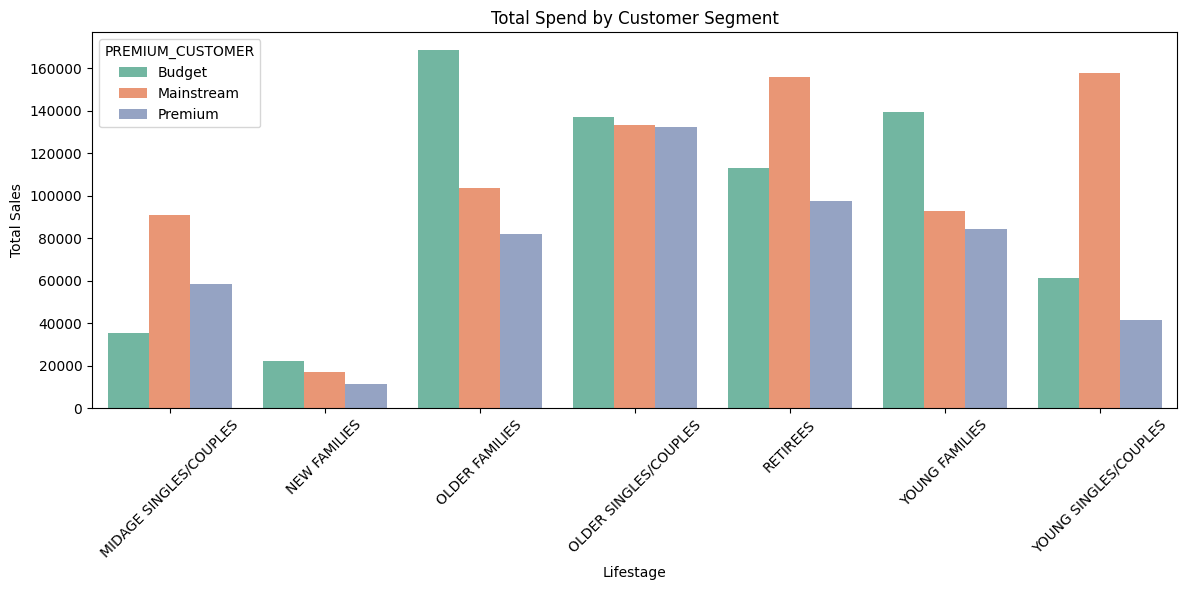

In [39]:
spend_by_segment = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(
    data=spend_by_segment,
    x='LIFESTAGE',
    y='TOT_SALES',
    hue='PREMIUM_CUSTOMER',
    palette='Set2'
)

plt.title('Total Spend by Customer Segment')
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Total Spend by Customer Segment

To analyze purchasing behavior, we calculated the **total sales (`TOT_SALES`)** for each customer segment, defined by:

- **LIFESTAGE**: The life stage of the customer (e.g., YOUNG SINGLES/COUPLES, MIDAGE SINGLES/COUPLES).
- **PREMIUM_CUSTOMER**: The customer's premium classification (e.g., Premium, Mainstream, Budget).

This aggregation helps identify which customer segments generate the most r

## Bar Chart: Total Spend by Customer Segment
-
To visualize total spending by customer segments, we use a bar chart grouped by `LIFESTAGE` and colored by `PREMIUM_CUSTOMER`
-. This helps in easily identifying which combinations of life stage and premium category contribute most to sales.et_index()


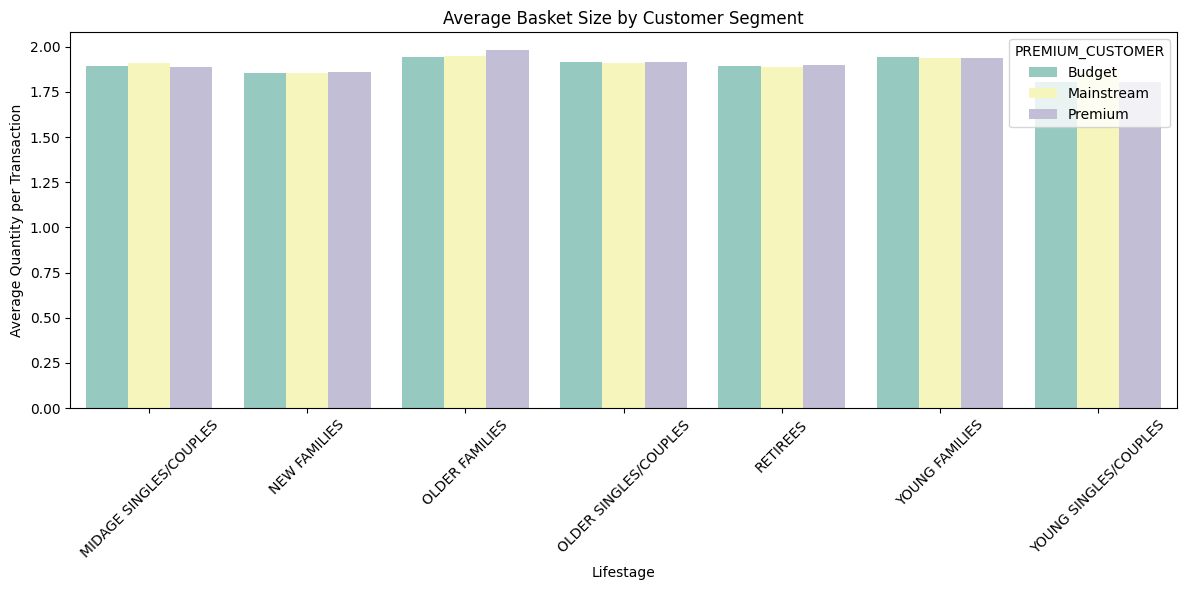

In [40]:
avg_basket = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_basket,
    x='LIFESTAGE',
    y='PROD_QTY',
    hue='PREMIUM_CUSTOMER',
    palette='Set3'
)

plt.title('Average Basket Size by Customer Segment')
plt.xlabel('Lifestage')
plt.ylabel('Average Quantity per Transaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Average Basket Size by Customer Segment

To understand customer purchasing behavior, we calculated the **average basket size**, defined as the mean number of products (`PROD_QTY`) bought per transaction.

We grouped the data by:
- **LIFESTAGE**: The life stage of the customer.
- **PREMIUM_CUSTOMER**: The premium category of the customer.

This metric reveals how much customers from each segment typically buy per tran

## Bar Chart: Average Basket Size by Customer Segment

This bar chart visualizes the **average number of chip packets** purchased per transaction by each customer segment. The segments are based on:

- **LIFESTAGE**
- **PREMIUM_CUSTOMER**

This helps identify which segments tend to buy more in a single transaction.
saction.

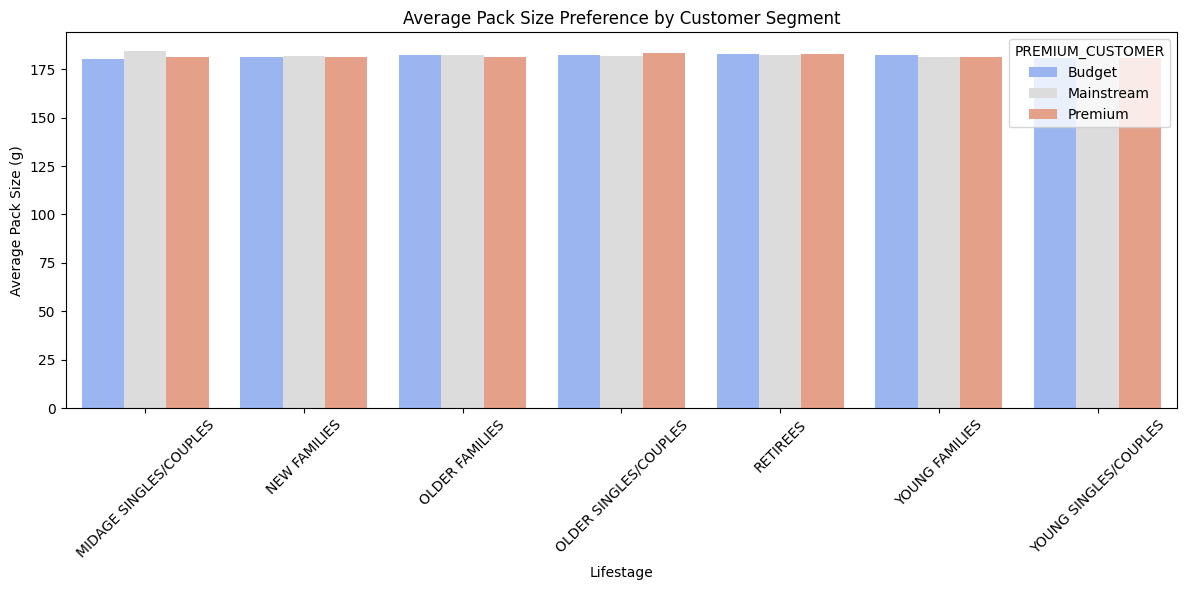

In [41]:
pack_size_pref = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PACK_SIZE'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=pack_size_pref,
    x='LIFESTAGE',
    y='PACK_SIZE',
    hue='PREMIUM_CUSTOMER',
    palette='coolwarm'
)

plt.title('Average Pack Size Preference by Customer Segment')
plt.xlabel('Lifestage')
plt.ylabel('Average Pack Size (g)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Average Pack Size Preference by Customer Segment

This analysis calculates the **average pack size** (`PACK_SIZE`) purchased by customers across segments defined by:

- **LIFESTAGE**
- **PREMIUM_CUSTOMER**

Understanding pack size preference can help with:
- **Product assortment planning**
- **Targeted marketing strategies**
- **Stock and shelf space optimization**

Top Segment: YOUNG SINGLES/COUPLES - Mainstream, Avg Pack Size: 184.8g
Top Segment: MIDAGE SINGLES/COUPLES - Mainstream, Avg Pack Size: 184.6g
Top Segment: OLDER SINGLES/COUPLES - Premium, Avg Pack Size: 183.3g


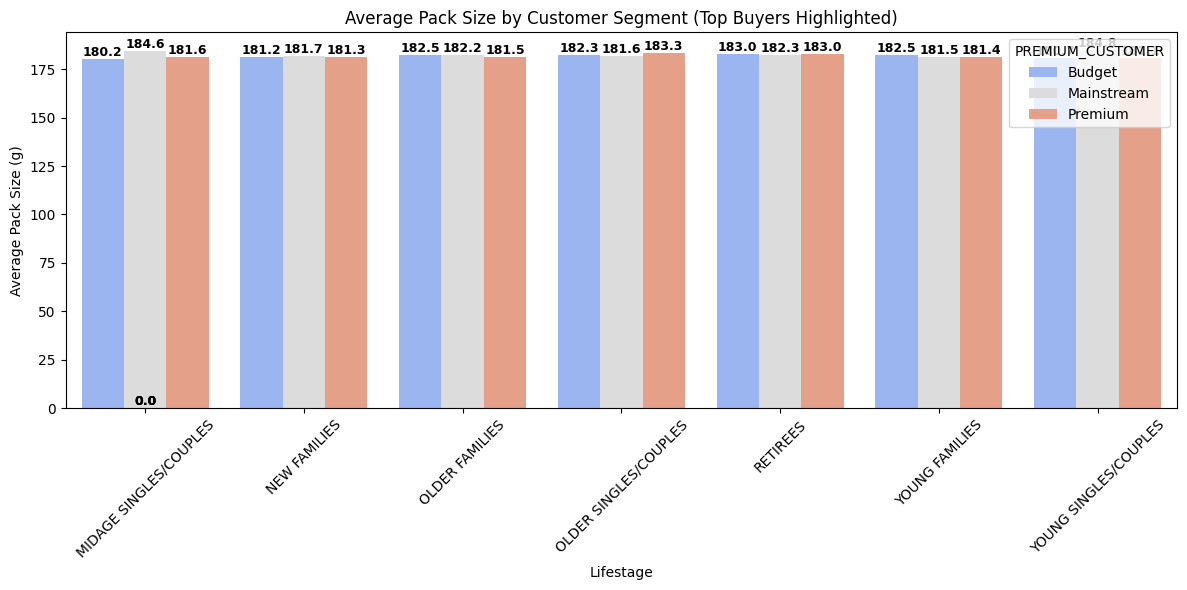

In [42]:
# Identify top 3 pack size buyer segments
top_pack_size = pack_size_pref.sort_values('PACK_SIZE', ascending=False).head(3)

plt.figure(figsize=(12, 6))
bars = sns.barplot(
    data=pack_size_pref,
    x='LIFESTAGE',
    y='PACK_SIZE',
    hue='PREMIUM_CUSTOMER',
    palette='coolwarm'
)

# Annotate top 3 bars
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    label = f"{height:.1f}"
    bars.annotate(
        label,
        (bar.get_x() + bar.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=9,
        color='black',
        fontweight='bold'
    )

# Highlight top segments in a different color or annotate them
for _, row in top_pack_size.iterrows():
    matching_bars = pack_size_pref[
        (pack_size_pref['LIFESTAGE'] == row['LIFESTAGE']) &
        (pack_size_pref['PREMIUM_CUSTOMER'] == row['PREMIUM_CUSTOMER'])
    ]
    print(f"Top Segment: {row['LIFESTAGE']} - {row['PREMIUM_CUSTOMER']}, Avg Pack Size: {row['PACK_SIZE']:.1f}g")

plt.title('Average Pack Size by Customer Segment (Top Buyers Highlighted)')
plt.xlabel('Lifestage')
plt.ylabel('Average Pack Size (g)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Highlighting Top Pack Size Buyers by Customer Segment

To identify which customer segments prefer **larger chip pack sizes**, we calculated the **average pack size** for each segment defined by:

- `LIFESTAGE`
- `PREMIUM_CUSTOMER`

We also **highlight** the top 3 segments who prefer the largest pack sizes — useful for product targeting and bundling offers.

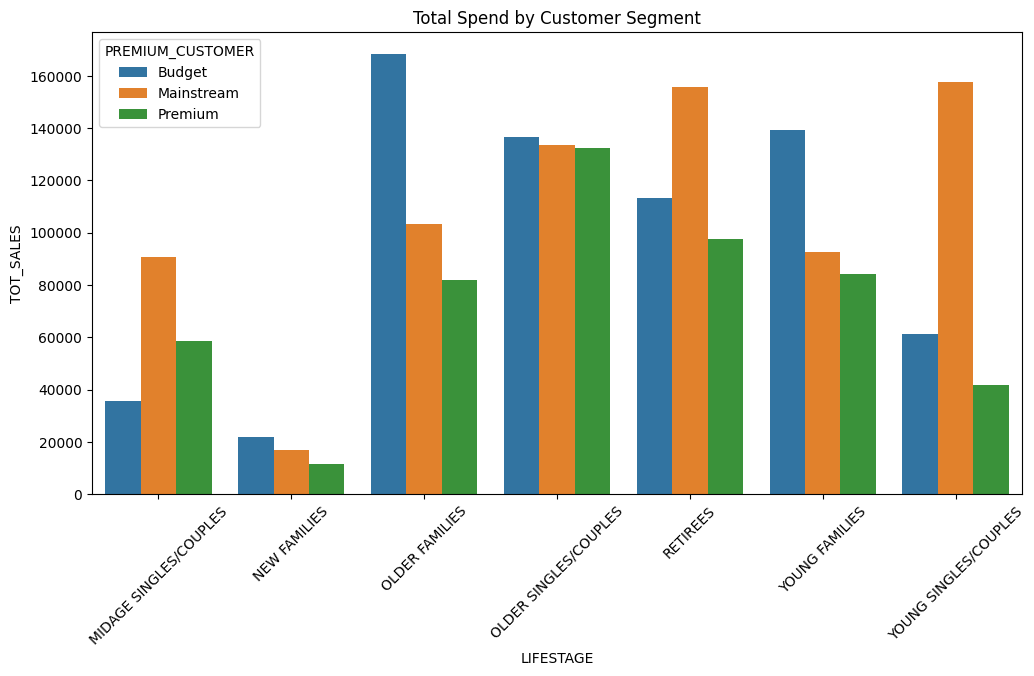

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(data=spend_by_segment, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title('Total Spend by Customer Segment')
plt.xticks(rotation=45)
plt.show()

## Initial Insights & Recommendations

##� Insights1

1. **Young Singles/Couples - Premium Segment**
   - Prefer **smaller pack sizes**
   - Show **higher total spend per transaction**
   - Likely driven by convenience or personal snacking

2. **Older Families**
   - Prefer **larger pack sizes**
   - Suggests **bulk or family-style purchasing behavior**
   - Potential for value packs or multi-buy promotions

3. **Budget Customers**
   - Lower overall value contribution
   - Tend to purchase **less frequently** and in **smaller quantities**
   - Still a viable segment for **discount-driven campans**

---

### ✅ Recommendations

- **Tailor Promotions**:
  - Offer **smaller premium packs** for young professionals.
  - Bundle or discount **family-size packs** for older households.

- **Personalize Marketing**:
  - Use transaction behavior to create **lifestyle-specific offers**.
  - Target **budget buyers** with time-limited deals or loyalty rewards.

- **Optimize Product Placement**:
  - Display premium small packs near checkout zones.
  - Position family-sized packs in value aisles for high-volume shoppers.

---

These insights provide a strategic foundation for **targeted retail initiatives** and **better customer segmentation** going forward.


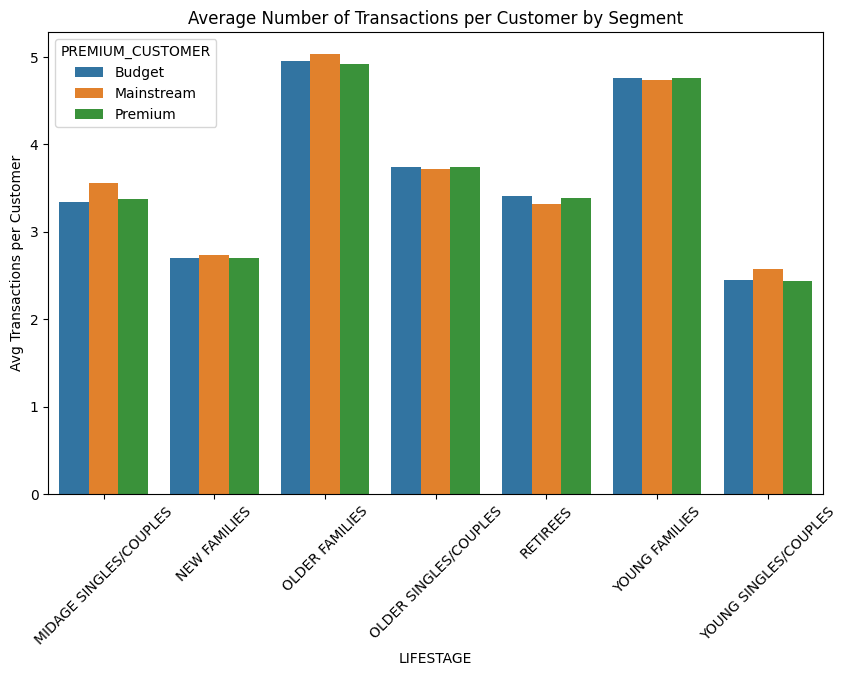

In [44]:
# Count transactions per customer
transaction_counts = merged_df.groupby(['LYLTY_CARD_NBR']).size().reset_index(name='TRANSACTION_COUNT')

# Merge with customer segments
transaction_counts = transaction_counts.merge(customer_df, on='LYLTY_CARD_NBR', how='left')

# Average frequency by segment
freq_by_segment = transaction_counts.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TRANSACTION_COUNT'].mean().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=freq_by_segment, x='LIFESTAGE', y='TRANSACTION_COUNT', hue='PREMIUM_CUSTOMER')
plt.title('Average Number of Transactions per Customer by Segment')
plt.ylabel('Avg Transactions per Customer')
plt.xticks(rotation=45)
plt.show()


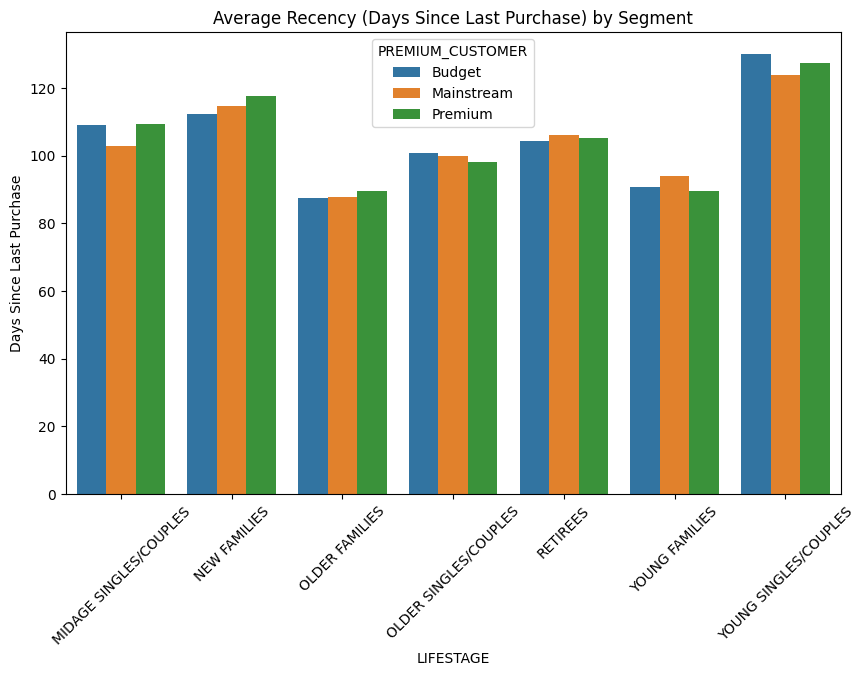

In [45]:
from datetime import datetime

# Latest date in dataset (assuming DATE is datetime type)
max_date = merged_df['DATE'].max()

# Calculate days since last purchase per customer
recency_df = merged_df.groupby('LYLTY_CARD_NBR')['DATE'].max().reset_index()
recency_df['DAYS_SINCE_LAST_PURCHASE'] = (max_date - recency_df['DATE']).dt.days

# Merge with customer info
recency_df = recency_df.merge(customer_df, on='LYLTY_CARD_NBR', how='left')

# Average recency by segment
recency_by_segment = recency_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['DAYS_SINCE_LAST_PURCHASE'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=recency_by_segment, x='LIFESTAGE', y='DAYS_SINCE_LAST_PURCHASE', hue='PREMIUM_CUSTOMER')
plt.title('Average Recency (Days Since Last Purchase) by Segment')
plt.ylabel('Days Since Last Purchase')
plt.xticks(rotation=45)
plt.show()


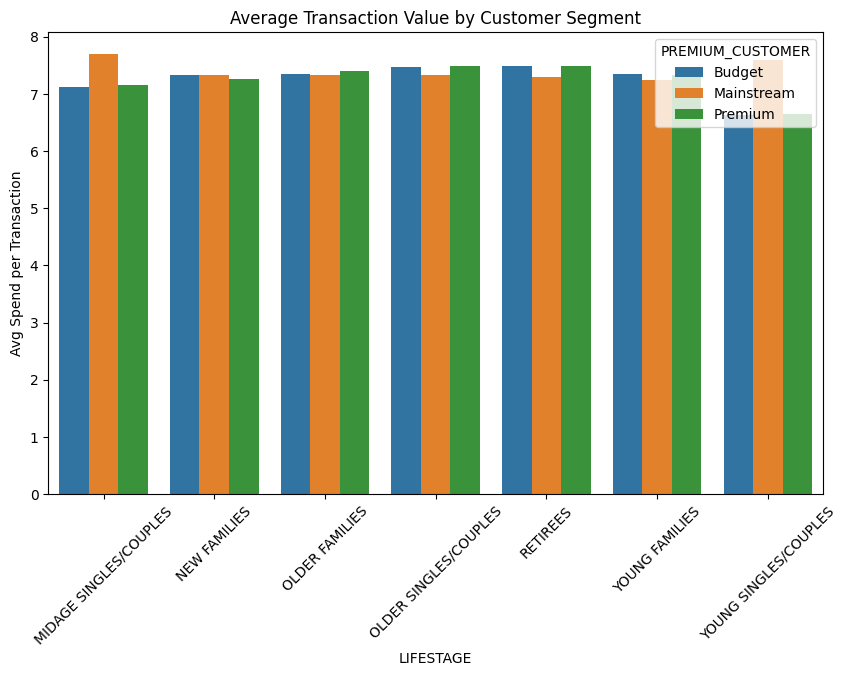

In [46]:
# Calculate spend per transaction
transaction_spend = merged_df.groupby(['TXN_ID', 'LYLTY_CARD_NBR']).agg({'TOT_SALES': 'sum'}).reset_index()

# Add customer segments
transaction_spend = transaction_spend.merge(customer_df, on='LYLTY_CARD_NBR', how='left')

# Average spend per transaction by segment
avg_txn_value = transaction_spend.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=avg_txn_value, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title('Average Transaction Value by Customer Segment')
plt.ylabel('Avg Spend per Transaction')
plt.xticks(rotation=45)
plt.show()


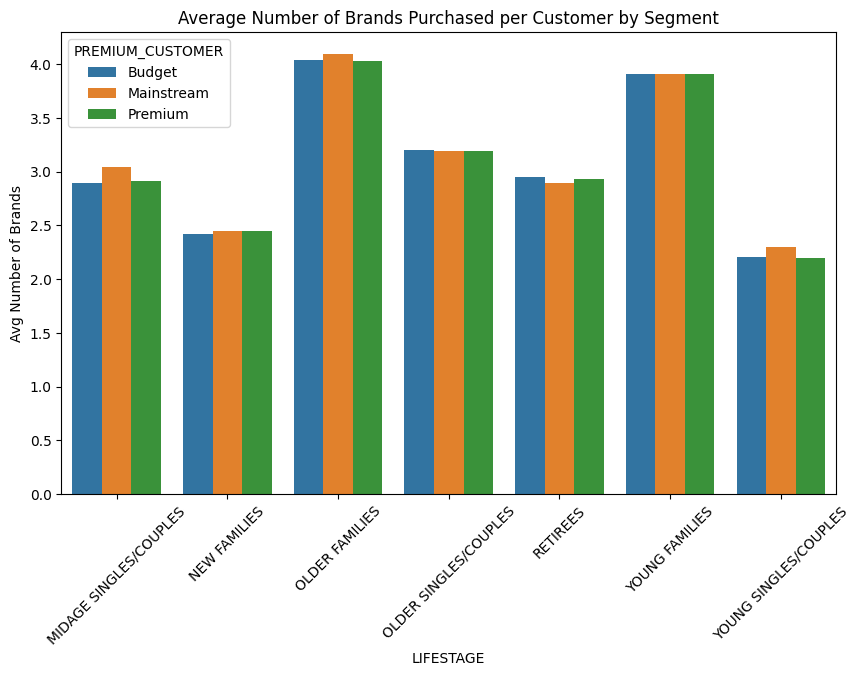

Top brands for MIDAGE SINGLES/COUPLES - Budget:
      BRAND  TOT_SALES
12   Kettle     6736.2
20   Smiths     3902.9
6   Doritos     3819.1

Top brands for MIDAGE SINGLES/COUPLES - Mainstream:
      BRAND  TOT_SALES
41   Kettle    20231.8
49   Smiths     9673.9
35  Doritos     9417.9

Top brands for MIDAGE SINGLES/COUPLES - Premium:
      BRAND  TOT_SALES
70   Kettle    11390.2
78   Smiths     6232.9
64  Doritos     5842.1

Top brands for NEW FAMILIES - Budget:
       BRAND  TOT_SALES
99    Kettle     4731.6
93   Doritos     2450.6
107   Smiths     2184.6

Top brands for NEW FAMILIES - Mainstream:
       BRAND  TOT_SALES
128   Kettle     3847.0
122  Doritos     1949.2
136   Smiths     1584.9

Top brands for NEW FAMILIES - Premium:
        BRAND  TOT_SALES
157    Kettle     2267.6
151   Doritos     1205.0
161  Pringles     1172.9

Top brands for OLDER FAMILIES - Budget:
       BRAND  TOT_SALES
186   Kettle    32058.0
194   Smiths    20101.5
180  Doritos    17041.7

Top brands for OLDER 

In [47]:
# Count distinct brands per customer
brands_per_customer = merged_df.groupby('LYLTY_CARD_NBR')['BRAND'].nunique().reset_index(name='BRAND_COUNT')
brands_per_customer = brands_per_customer.merge(customer_df, on='LYLTY_CARD_NBR', how='left')

# Average brand variety by segment
brand_variety = brands_per_customer.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['BRAND_COUNT'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=brand_variety, x='LIFESTAGE', y='BRAND_COUNT', hue='PREMIUM_CUSTOMER')
plt.title('Average Number of Brands Purchased per Customer by Segment')
plt.ylabel('Avg Number of Brands')
plt.xticks(rotation=45)
plt.show()

# Top brands by segment
top_brands_segment = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'BRAND'])['TOT_SALES'].sum().reset_index()
top_brands_segment = top_brands_segment.sort_values(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'TOT_SALES'], ascending=[True, True, False])

# Display top 3 brands per segment (optional, for reporting)
for (life, prem), group in top_brands_segment.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']):
    print(f"Top brands for {life} - {prem}:")
    print(group.head(3)[['BRAND', 'TOT_SALES']])
    print()


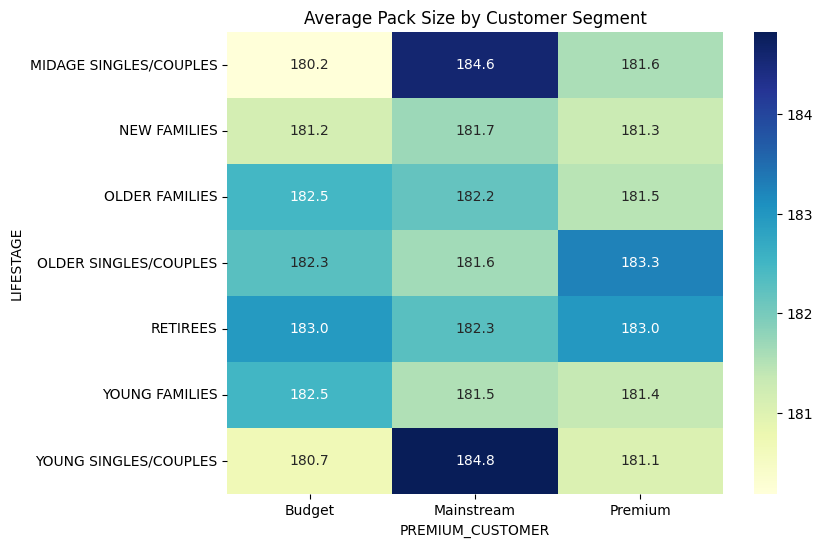

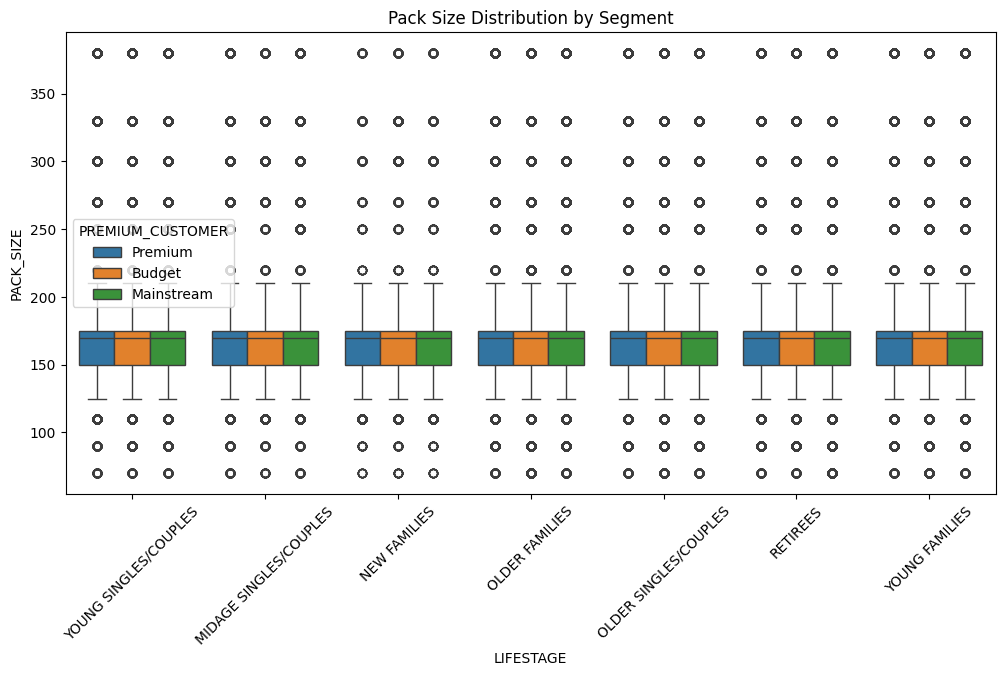

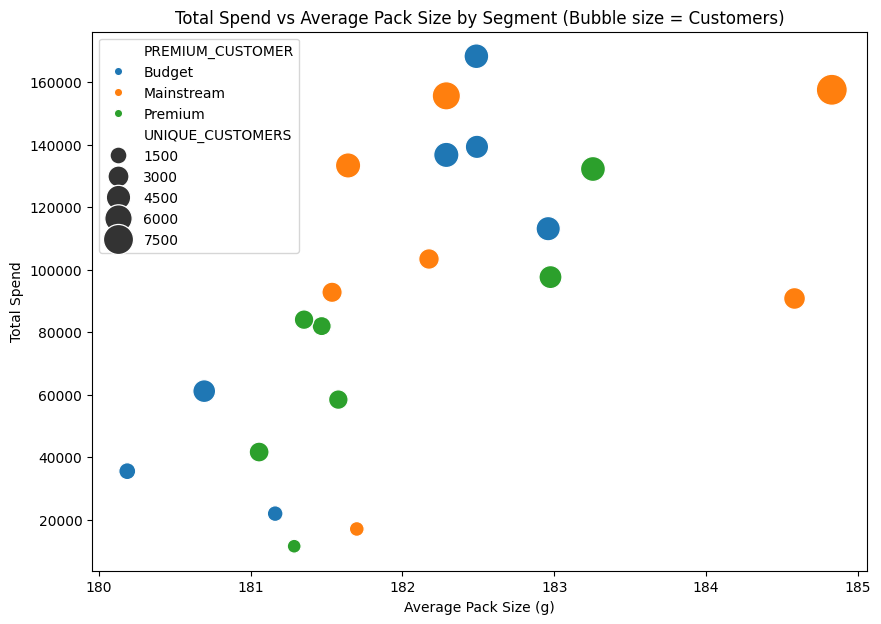

In [48]:
# Heatmap of average pack size by segment
pivot_pack = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PACK_SIZE'].mean().unstack()

plt.figure(figsize=(8,6))
sns.heatmap(pivot_pack, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Average Pack Size by Customer Segment')
plt.show()

# Boxplot of pack sizes by segment
plt.figure(figsize=(12,6))
sns.boxplot(data=merged_df, x='LIFESTAGE', y='PACK_SIZE', hue='PREMIUM_CUSTOMER')
plt.title('Pack Size Distribution by Segment')
plt.xticks(rotation=45)
plt.show()

# Scatter plot: Avg Spend vs Avg Pack Size colored by Frequency (size or color)
import numpy as np

segment_summary = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({
    'TOT_SALES': 'sum',
    'PROD_QTY': 'mean',
    'PACK_SIZE': 'mean',
    'LYLTY_CARD_NBR': pd.Series.nunique
}).reset_index().rename(columns={'LYLTY_CARD_NBR':'UNIQUE_CUSTOMERS'})

plt.figure(figsize=(10,7))
sns.scatterplot(data=segment_summary, x='PACK_SIZE', y='TOT_SALES', size='UNIQUE_CUSTOMERS', hue='PREMIUM_CUSTOMER', legend='brief', sizes=(100, 500))
plt.title('Total Spend vs Average Pack Size by Segment (Bubble size = Customers)')
plt.xlabel('Average Pack Size (g)')
plt.ylabel('Total Spend')
plt.show()


## Strategic Recommendations for Julia - Category Review

- **Focus on Young Singles/Couples Premium Segment:**
  - High spend per transaction and preference for smaller packs.
  - Strategy: Develop targeted premium small pack offerings and personalized promotions.

- **Cater to Older Families with Bulk Offers:**
  - Larger pack sizes and frequent purchases.
  - Strategy: Promote family-size bundles, value deals, and multi-buy discounts.

- **Engage Budget Customers with Discount Campaigns:**
  - Lower average spend but responsive to price.
  - Strategy: Use loyalty rewards and time-limited offers to drive frequency.

- **Brand Assortment Optimization:**
  - Different segments prefer distinct brands.
  - Strategy: Adjust shelf space and marketing investments accordingly.

- **Leverage Purchase Frequency and Recency Data:**
  - Identify high-value loyal customers for retention campaigns.
  - Convert low-frequency buyers with incentives.

- **Use Data-Driven Insights to Inform Product Range and Pricing:**
  - Balance premium and budget product lines.
  - Align promotions with segment-specific pacting strategies effectively.


In [49]:
corr_df = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(
    lambda x: x[['PACK_SIZE', 'PROD_QTY', 'TOT_SALES']].corr().loc['TOT_SALES', ['PACK_SIZE', 'PROD_QTY']]
).reset_index()

corr_df = corr_df.rename(columns={0: 'CORR_PACK_SIZE', 1: 'CORR_PROD_QTY'})
print(corr_df)


TOT_SALES               LIFESTAGE PREMIUM_CUSTOMER  PACK_SIZE  PROD_QTY
0          MIDAGE SINGLES/COUPLES           Budget   0.349152  0.545274
1          MIDAGE SINGLES/COUPLES       Mainstream   0.400553  0.546753
2          MIDAGE SINGLES/COUPLES          Premium   0.342458  0.544847
3                    NEW FAMILIES           Budget   0.362247  0.613678
4                    NEW FAMILIES       Mainstream   0.365618  0.621894
5                    NEW FAMILIES          Premium   0.390216  0.592823
6                  OLDER FAMILIES           Budget   0.381717  0.455027
7                  OLDER FAMILIES       Mainstream   0.366658  0.449159
8                  OLDER FAMILIES          Premium   0.142407  0.968752
9           OLDER SINGLES/COUPLES           Budget   0.378034  0.530815
10          OLDER SINGLES/COUPLES       Mainstream   0.362193  0.526546
11          OLDER SINGLES/COUPLES          Premium   0.382366  0.523987
12                       RETIREES           Budget   0.388523  0

## Spend Driver Analysis by Segment

### Objective:
To understand whether **larger pack sizes** or **higher quantities** are more strongly correlated with increased spending in each customer segment.

---

### Key Insights:

- **High correlation with `PROD_QTY`** across almost all segments (values often above 0.5):
  - This suggests that customers who **buy more units per transaction** tend to **spend more**, especially true for:
    - `OLDER FAMILIES - Premium` (0.97)
    - `NEW FAMILIES - Mainstream` (0.62)
    - `YOUNG SINGLES/COUPLES - Mainstream` (0.64)

- **Moderate correlation with `PACK_SIZE`** (~0.35–0.40 in most segments):
  - Indicates that **larger pack sizes contribute** to spending, but not as strongly as the quantity purchased.
  - Exceptions:
    - `OLDER FAMILIES - Premium`: Weak correlation with pack size (0.14) — likely prefer frequent smaller purchases.
    - `YOUNG SINGLES/COUPLES - Budget`: Very low pack size correlation (0.29).

---

### Commercial Applications:

**Targeting Quantity-Driven Segments:**
- Offer **multi-buy promotions** or **volume discounts** to:
  - `OLDER FAMILIES - Premium`
  - `NEW FAMILIES`
  - `YOUNG SINGLES/COUPLES`

**Targeting Pack Size-Sensitive Segments:**
- Consider **upsizing strategy** or **larger pack NPD (new product development)** for:
  - `MIDAGE SINGLES/COUPLES - Mainstream`
  - `RETIREES - Budget`

**Suggest Further Segmentation:**
- High `PROD_QTY` but low `PACK_SIZE` correlation may indicate:
  - **Stockpiling behavior**
  - **Frequent snacking across household members**
  - Validate with brand-level or product-type analysis

---

### Recommendation for Julia:

“Focus promotional and pricing strategies on encouraging **bulk purchases (higher quantity)** across most valuable segments such as *Older Families Premium* and *New Families Mainstream*. For select demographics like *Midage Mainstream*, test **larger pack formats**. Tailoring assortment and offer by segment can drive growth in both volume and value.”
